<a target="_blank" href="https://colab.research.google.com/github/victorlymarev/pandas/blob/main/notebooks/16-unique-values-and-duplicates.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [2]:
import pandas as pd
import os

Читаем таблицу

In [3]:
path_empl = '../tables/employees.parquet' if os.path.exists('../tables/employees.parquet') else 'https://drive.google.com/uc?id=1AARD5-eVlCxoApt5CYZebrC3Cqw42lvj'

empl = pd.read_parquet(path_empl).query('report_dt > "2022-09-30"')
empl.head()

,report_dt,i_pernr,fio,sex,shop_id,pos_name,pos_id,closest_boss_pos_id,mgmt_flag,salary_fork,birth_date,education,employee_evaluation,salary
27931,2022-10-31,100213,Васильева Дарья Тимуровна,женский,1,Директор магазина,11,<NA>,1,0,1994-02-16,среднее профессиональное,4,76600.0
27932,2022-10-31,36,Балашов Петр Максимович,мужской,1,Старший кассир,12,11,0,2,1980-09-16,высшее,7,42700.0
27933,2022-10-31,712,Филимонов Дмитрий Васильевич,мужской,1,Кассир,13,12,0,0,1974-12-12,основное общее,4,20900.0
27934,2022-10-31,1850,Демьянова Юлия Ярославовна,женский,1,Кассир,14,12,0,0,1980-08-15,среднее профессиональное,5,21200.0
27935,2022-10-31,1617,Головина Кристина Захаровна,женский,1,Кассир,15,12,0,2,1974-04-30,среднее общее,8,29000.0


In [4]:
empl['pos_name'].head()

27931    Директор магазина
27932       Старший кассир
27933               Кассир
27934               Кассир
27935               Кассир
Name: pos_name, dtype: string

## value_counts
Считает сколько раз значение встретилось в колонке

In [5]:
empl['pos_name'].value_counts()

Продавец-консультант              738
Кассир                            396
Директор магазина                  69
Старший кассир                     69
Товаровед                          63
Заместитель директора магазина     62
Мастер по ремонту одежды           15
Уборщик                            15
Бухгалтер                          14
Name: pos_name, dtype: Int64

#### Если normalize=True, то метод счиатет долю каждого значения в столбце

In [6]:
empl['pos_name'].value_counts(normalize=True)

Продавец-консультант              0.512144
Кассир                            0.274809
Директор магазина                 0.047883
Старший кассир                    0.047883
Товаровед                          0.04372
Заместитель директора магазина    0.043026
Мастер по ремонту одежды          0.010409
Уборщик                           0.010409
Бухгалтер                         0.009715
Name: pos_name, dtype: Float64

#### По умолчанию пропуски не считаются, но это можно изменить

In [7]:
empl['closest_boss_pos_id'].value_counts(dropna=False)

<NA>    69
72      54
132     48
182     47
82      46
        ..
81       3
101      3
161      3
171      2
221      2
Name: closest_boss_pos_id, Length: 69, dtype: Int64

#### Значения можно отсортировать по возрастанию

In [8]:
empl['closest_boss_pos_id'].value_counts(ascending=True)

221     2
171     2
211     3
201     3
161     3
       ..
232    45
82     46
182    47
132    48
72     54
Name: closest_boss_pos_id, Length: 68, dtype: Int64

#### С помощью метода удобно строить распределения

<Axes: >

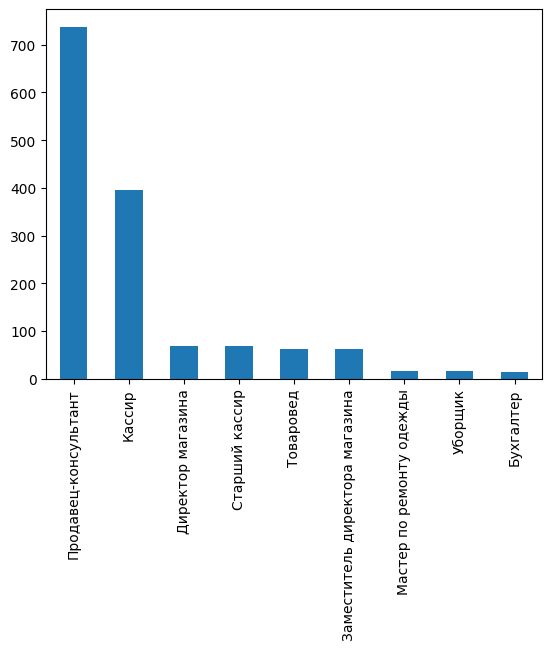

In [9]:
empl['pos_name'].value_counts().plot(kind='bar')

<Axes: >

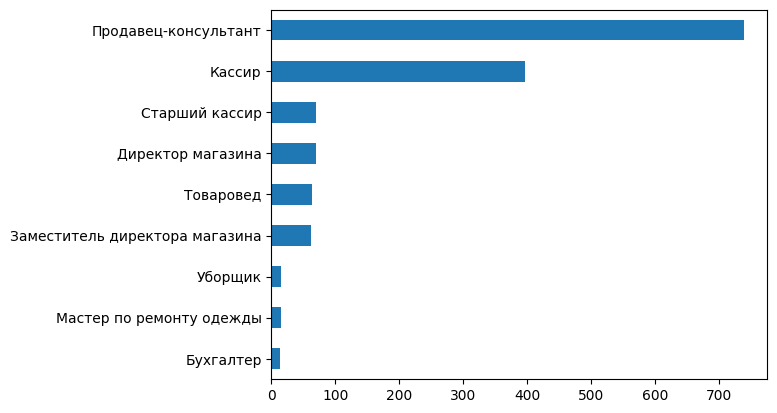

In [10]:
empl['pos_name'].value_counts(ascending=True).plot(kind='barh')

## unique
Метод выводит уникальные значения в колонке

In [11]:
empl['pos_name'].unique()

<StringArray>
[             'Директор магазина',                 'Старший кассир',
                         'Кассир',           'Продавец-консультант',
 'Заместитель директора магазина',                      'Бухгалтер',
                      'Товаровед',       'Мастер по ремонту одежды',
                        'Уборщик']
Length: 9, dtype: string

#### Если после метода unique вызвать метод tolist, то даты приведутся к целым числам

In [12]:
empl['report_dt'].unique()

array(['2022-10-31T00:00:00.000000000', '2022-11-30T00:00:00.000000000',
       '2022-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [13]:
empl['report_dt'].unique().tolist()

[1667174400000000000, 1669766400000000000, 1672444800000000000]

In [14]:
list(empl['report_dt'].unique())

[numpy.datetime64('2022-10-31T00:00:00.000000000'),
 numpy.datetime64('2022-11-30T00:00:00.000000000'),
 numpy.datetime64('2022-12-31T00:00:00.000000000')]

## nunique
Метод выводит количество уникальных значений в столбце

In [15]:
empl['report_dt'].nunique()

3

In [16]:
empl.nunique()

report_dt                3
i_pernr                508
fio                    508
sex                      2
shop_id                 23
pos_name                 9
pos_id                 476
closest_boss_pos_id     68
mgmt_flag                2
salary_fork              3
birth_date             494
education                4
employee_evaluation      8
salary                 121
dtype: int64

## duplicated
Метод проверяет встречалось ли такое же значение в колонке

In [17]:
empl['pos_name'].duplicated()

27931    False
27932    False
27933    False
27934     True
27935     True
         ...  
29367     True
29368     True
29369     True
29370     True
29371     True
Name: pos_name, Length: 1441, dtype: bool

Параметр keep принимает 3 значения:
1. False - Помечает как True все повторяющиеся значения
2. 'first' - Первое повторяющееся значение помечается как False, остальные как True (значение по умолчанию)
3. 'last' - Последнее повторяющееся значение помечается как False, остальные как True

In [18]:
empl['pos_name'].duplicated(keep=False)

27931    True
27932    True
27933    True
27934    True
27935    True
         ... 
29367    True
29368    True
29369    True
29370    True
29371    True
Name: pos_name, Length: 1441, dtype: bool

## drop_duplicates

Удаляет повторяющиеся значения

In [19]:
empl['pos_name'].drop_duplicates()

27931                 Директор магазина
27932                    Старший кассир
27933                            Кассир
27937              Продавец-консультант
27944    Заместитель директора магазина
27946                         Бухгалтер
27965                         Товаровед
27967          Мастер по ремонту одежды
27968                           Уборщик
Name: pos_name, dtype: string

#### В метод можно передать название колонки или список из названий колонок, по которым удалять повторяющиеся наблюдения

In [20]:
empl.drop_duplicates('fio').head()

,report_dt,i_pernr,fio,sex,shop_id,pos_name,pos_id,closest_boss_pos_id,mgmt_flag,salary_fork,birth_date,education,employee_evaluation,salary
27931,2022-10-31,100213,Васильева Дарья Тимуровна,женский,1,Директор магазина,11,<NA>,1,0,1994-02-16,среднее профессиональное,4,76600.0
27932,2022-10-31,36,Балашов Петр Максимович,мужской,1,Старший кассир,12,11,0,2,1980-09-16,высшее,7,42700.0
27933,2022-10-31,712,Филимонов Дмитрий Васильевич,мужской,1,Кассир,13,12,0,0,1974-12-12,основное общее,4,20900.0
27934,2022-10-31,1850,Демьянова Юлия Ярославовна,женский,1,Кассир,14,12,0,0,1980-08-15,среднее профессиональное,5,21200.0
27935,2022-10-31,1617,Головина Кристина Захаровна,женский,1,Кассир,15,12,0,2,1974-04-30,среднее общее,8,29000.0


In [21]:
empl.drop_duplicates(['i_pernr', 'pos_name']).head()

,report_dt,i_pernr,fio,sex,shop_id,pos_name,pos_id,closest_boss_pos_id,mgmt_flag,salary_fork,birth_date,education,employee_evaluation,salary
27931,2022-10-31,100213,Васильева Дарья Тимуровна,женский,1,Директор магазина,11,<NA>,1,0,1994-02-16,среднее профессиональное,4,76600.0
27932,2022-10-31,36,Балашов Петр Максимович,мужской,1,Старший кассир,12,11,0,2,1980-09-16,высшее,7,42700.0
27933,2022-10-31,712,Филимонов Дмитрий Васильевич,мужской,1,Кассир,13,12,0,0,1974-12-12,основное общее,4,20900.0
27934,2022-10-31,1850,Демьянова Юлия Ярославовна,женский,1,Кассир,14,12,0,0,1980-08-15,среднее профессиональное,5,21200.0
27935,2022-10-31,1617,Головина Кристина Захаровна,женский,1,Кассир,15,12,0,2,1974-04-30,среднее общее,8,29000.0


Параметр keep принимает 3 значения:
1. False - Все дубликаты удаляются
2. 'first' - Первое повторяющееся значение остается, а остальные удаляются (значение по умолчанию)
3. 'last' - Последнее повторяющееся значение остается, а остальные удаляются

In [22]:
empl.drop_duplicates(['i_pernr', 'pos_name'], keep='last').head()

,report_dt,i_pernr,fio,sex,shop_id,pos_name,pos_id,closest_boss_pos_id,mgmt_flag,salary_fork,birth_date,education,employee_evaluation,salary
27946,2022-10-31,100190,Герасимов Федор Семенович,мужской,2,Бухгалтер,24,23,1,0,1983-10-31,среднее общее,5,50600.0
28080,2022-10-31,1790,Потапова Валерия Даниловна,женский,8,Продавец-консультант,812,82,0,0,1999-08-12,среднее общее,5,25800.0
28130,2022-10-31,1381,Егоров Дмитрий Анатольевич,мужской,10,Продавец-консультант,1015,102,0,2,1975-10-12,среднее общее,7,38000.0
28148,2022-10-31,1385,Воронова Ксения Руслановна,женский,11,Продавец-консультант,1111,112,0,2,1963-05-11,среднее профессиональное,4,38000.0
28160,2022-10-31,1412,Зотов Леонид Александрович,мужской,11,Продавец-консультант,1123,112,0,2,1976-10-31,среднее профессиональное,6,38000.0


# Задания

#### Описание таблиц лежит [здесь](https://github.com/victorlymarev/pandas/tree/main/tables)

Некоторые таблицы занимают много памяти, поэтому каждые 5-10 заданий лучше перезапускайте ноутбук.

Если вы будете работать с этим ноутбуком в google colab и у вас что-то не будет работать, то раскоментируйте ячейку ниже (для этого выделите содержимое ячейки и нажмите на клавиши ctrl / (если смотреть по английской раскладке или ctrl . для русской), либо просто руками уберите # и пробел после нее в каждой строчке) и запустите ее.

In [ ]:
# import os
# os._exit(00)
# !pip install pyarrow pandas==1.5.3

### Задание 1

Посмотрите на самые часты бренды (поле brand)

In [ ]:
import os
import pandas as pd

path_goods_descr = '../tables/goods_description.parquet' if os.path.exists('../tables/goods_description.parquet') else 'https://drive.google.com/uc?id=1YbiD02Rev-X_WWV9nPSG1zZFmEh2JjPh'

goods_descr = pd.read_parquet(path_goods_descr)
goods_descr.head()

In [ ]:
# напишите свой код здесь

### Задание 2

Посмотрите сколько в таблице уникальных категорий товаров (поле product_type)

In [ ]:
import os
import pandas as pd

path_goods_descr = '../tables/goods_description.parquet' if os.path.exists('../tables/goods_description.parquet') else 'https://drive.google.com/uc?id=1YbiD02Rev-X_WWV9nPSG1zZFmEh2JjPh'

goods_descr = pd.read_parquet(path_goods_descr)
goods_descr.head()

In [ ]:
# напишите свой код здесь

### Задание 3

Посчитайте количество уникальных значений в каждой колонке таблицы

In [ ]:
import os
import pandas as pd

path_empl = '../tables/employees.parquet' if os.path.exists('../tables/employees.parquet') else 'https://drive.google.com/uc?id=1AARD5-eVlCxoApt5CYZebrC3Cqw42lvj'

empl = pd.read_parquet(path_empl)
empl.head()

In [ ]:
# напишите свой код здесь

### Задание 4

Посчитайте, сколько в таблице товаров каждого цвета, не учитывая размер товаров. ДЛя этого сначала удалите дубликаты по полям colour и product_code_2

In [ ]:
import os
import pandas as pd

path_goods_descr = '../tables/goods_description.parquet' if os.path.exists('../tables/goods_description.parquet') else 'https://drive.google.com/uc?id=1YbiD02Rev-X_WWV9nPSG1zZFmEh2JjPh'

goods_descr = pd.read_parquet(path_goods_descr)
goods_descr.head()

In [ ]:
# напишите свой код здесь

### Задание 5

Для каждого чека посчитайте количество уникальных товаров в нем

In [ ]:
# таблица sales - большая, и в некоторых случаях ваш компьютер может не справиться с ее обработкой
# поэтому лучше работайте с частью этой таблицы
# но если вы хотите попробовать поработать с полной версией таблицы,
# можете заменить переменную path_sales_2022 на path_sales внутри функции read_parquet

import os
import pandas as pd

path_sales_2022 = '../tables/sales_2022.parquet' if os.path.exists('../tables/sales_2022.parquet') else 'https://drive.google.com/uc?id=17e7FwXVdsWc2aziK9s5KidIvPcfKt9F5'
# path_sales = '../tables/sales.parquet' if os.path.exists('../tables/sales.parquet') else "https://drive.usercontent.google.com/download?id=15KwSxyM6hpNABGe6_vsrFZvD09VfHFyK&export=download&authuser=1&confirm=t&uuid=115bd48c-cc2c-4f2a-8b42-be5ca6ef6db8&at=APZUnTUVb8nfNANw5wr9Cad7PJ3U:1693327774694"

sales = pd.read_parquet(path_sales_2022)
sales.head()

In [ ]:
# напишите свой код здесь

### Задание 6

На конец ноября 2021 года посчитайте долю мужчин и долю женщин среди сотрудников, занимающих руководящие позиции в магазине (mgmt == 1)

In [ ]:
import os
import pandas as pd

path_empl = '../tables/employees.parquet' if os.path.exists('../tables/employees.parquet') else 'https://drive.google.com/uc?id=1AARD5-eVlCxoApt5CYZebrC3Cqw42lvj'

empl = pd.read_parquet(path_empl)
empl.head()

In [ ]:
# напишите свой код здесь

### Задание 7

Найдите людей с одинаковым разным табельным номером, но одинаковым фио

In [ ]:
import os
import pandas as pd

path_empl = '../tables/employees.parquet' if os.path.exists('../tables/employees.parquet') else 'https://drive.google.com/uc?id=1AARD5-eVlCxoApt5CYZebrC3Cqw42lvj'

empl = pd.read_parquet(path_empl)
empl.head()

In [ ]:
# напишите свой код здесь

### Задание 8

Задание на нампай

В нампае для подсчета уникальных значений есть функция np.unique. В нее передается массив. Функция возвращает массив из уникальные значений. Если передать в парметр return_counts значение True, то вернется 2 массива. Первый массив будет содержать уникальные значения, а второй число повторений.

Найдите сколько раз повторяется каждое значение в массиве.

In [ ]:
import numpy as np
np.random.seed(1432567)
# Случайным образом выбираем значения из первого списка с заданными вероятностями (второй спискок)
matrix = np.random.choice(['огурец', 'картошка', 'лук', 'чеснок', 'укроп', 'баклажан'],
                          p=[0.2, 0.4, 0.1, 0.05, 0.05, 0.2], size=(100, 100))

In [ ]:
# напишите свой код здесь

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

C:\Users\Александр\AppData\Local\Temp\ipykernel_14932\3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML
